In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/cajjster/data_files/main/vgsales.csv")
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16291, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df[["Name", "Platform", "Genre", "Publisher"]]

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco
16287,Men in Black II: Alien Escape,GC,Shooter,Infogrames
16288,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision
16289,Know How 2,DS,Puzzle,7G//AMES


<Axes: >

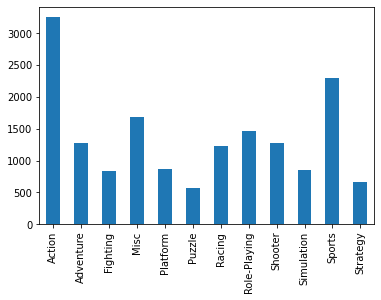

In [8]:
df["Genre"].value_counts().sort_index().plot.bar()

In [ ]:
df.sort_values(by="Global Sales")

In [ ]:
df.loc[(df["Platform"] == "Wii") & (df["Genre"] == "Role-Playing")].sort_values(by="Global Sales", ascending=False)

In [11]:
between_2M_10M = df["Global Sales"].between(2, 10)
y_90 = df["Year"].between(1990, 1999)
y_00 = df["Year"].between(2000, 2009)
y_10 = df["Year"].between(2010, 2019)

In [12]:
df.loc[between_2M_10M & y_90]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
63,Mario Kart 64,N64,1996,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
66,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
69,Gran Turismo 2,PS,1999,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
71,Donkey Kong Country,SNES,1994,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30
76,Super Mario Kart,SNES,1992,Racing,Nintendo,3.54,1.24,3.81,0.18,8.76
...,...,...,...,...,...,...,...,...,...,...
796,Warcraft: Orcs & Humans,PC,1994,Strategy,Activision,0.89,1.08,0.00,0.11,2.08
808,R4: Ridge Racer Type 4,PS,1998,Racing,Namco Bandai Games,0.68,0.46,0.79,0.13,2.06
817,NBA Jam,GEN,1992,Sports,Arena Entertainment,1.75,0.25,0.00,0.05,2.05
827,1080°: TenEighty Snowboarding,N64,1998,Sports,Nintendo,1.25,0.61,0.13,0.05,2.03


In [13]:
df.loc[between_2M_10M & y_90, "Genre"].value_counts(normalize=True)

Platform        0.198413
Action          0.166667
Racing          0.119048
Role-Playing    0.095238
Fighting        0.095238
Shooter         0.063492
Strategy        0.063492
Misc            0.063492
Sports          0.055556
Simulation      0.031746
Adventure       0.031746
Puzzle          0.015873
Name: Genre, dtype: float64

In [14]:
df.loc[between_2M_10M & y_00, "Genre"].value_counts(normalize=True)

Action          0.205263
Sports          0.134211
Role-Playing    0.113158
Shooter         0.105263
Misc            0.105263
Platform        0.086842
Racing          0.084211
Fighting        0.063158
Simulation      0.052632
Puzzle          0.031579
Adventure       0.010526
Strategy        0.007895
Name: Genre, dtype: float64

In [15]:
df.loc[between_2M_10M & y_10, "Genre"].value_counts(normalize=True)

Action          0.253112
Shooter         0.190871
Sports          0.190871
Role-Playing    0.120332
Misc            0.082988
Platform        0.049793
Racing          0.041494
Simulation      0.029046
Fighting        0.020747
Adventure       0.012448
Strategy        0.004149
Puzzle          0.004149
Name: Genre, dtype: float64

In [16]:
df.loc[~df["Genre"].isin(["Puzzle", "Strategy", "Adventure"])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16285,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [18]:
# Let's find out which Racing Games had the highest sales in EU compared to the NA, JP, and Other Sales
# between the years 2000-2009

racing = df["Genre"] == "Racing"
highest_EU = (df["EU_Sales"] > df["JP_Sales"]) & (df["EU_Sales"] > df["NA_Sales"]) & (df["EU_Sales"] > df["Other_Sales"])
y_00s = df["Year"].between(2000, 2009)

df.loc[racing & highest_EU & y_00s, ["Name", "EU_Sales"]].sort_values(by="EU_Sales", ascending=False).head().set_index("Name")

,EU_Sales
Name,
Need for Speed Underground 2,3.02
The Simpsons: Hit & Run,2.19
Gran Turismo 5 Prologue,1.83
MotorStorm,1.61
Gran Turismo (PSP),1.59


## Most Useful Method for Data Analysis

In [19]:
# query()

df.query("NA_Sales < JP_Sales").head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
27,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
41,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
66,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
73,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09


In [23]:
df.query("Publisher == 'Ubisoft' and Year > 2014").head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
350,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
407,Assassin's Creed Syndicate,PS4,2015,Action,Ubisoft,0.80,1.92,0.06,0.50,3.28
749,Tom Clancy's Rainbow Six: Siege,PS4,2015,Shooter,Ubisoft,0.54,1.16,0.13,0.32,2.15
761,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
835,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01


In [24]:
# unique() and nunique()

df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [25]:
df["Year"].nunique()

39

In [ ]:
for i in df.select_dtypes("object"):
    print(df[i].unique())

In [37]:
ps3 = df.query("Platform == 'PS3'")
ps3.set_index("Name", inplace=True)
ps3.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
Name,,,,,,,,,
Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77


<Axes: xlabel='Name'>

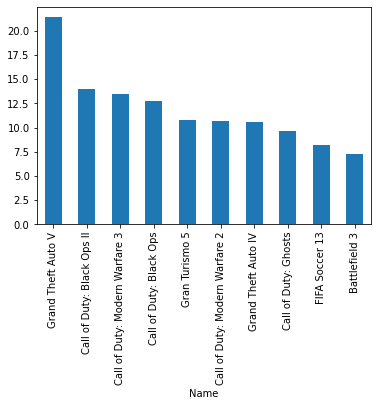

In [38]:
ps3.nlargest(n=10, columns="Global Sales").loc[:,"Global Sales"].plot.bar()

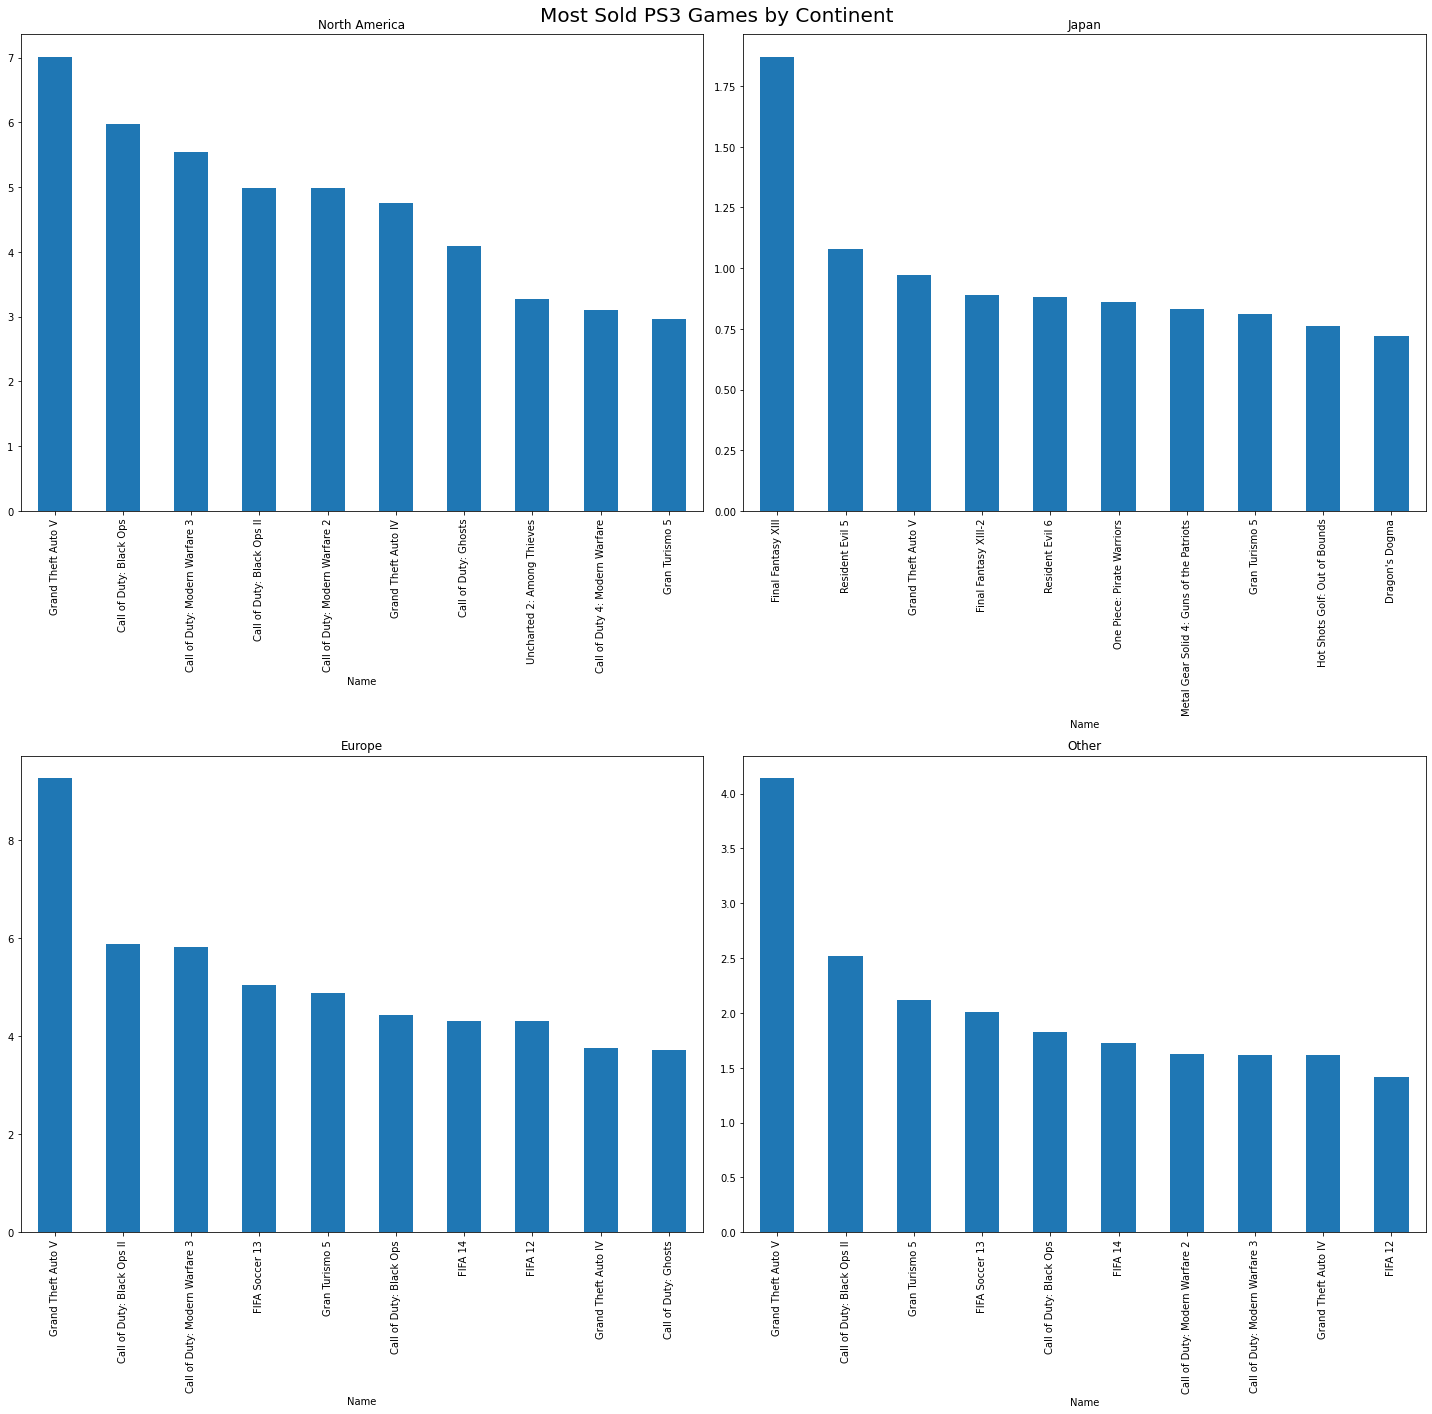

In [39]:
fig, ax = plt.subplots(2,2, figsize=(20,20))

ps3.nlargest(n=10, columns="NA_Sales").loc[:,"NA_Sales"].plot.bar(ax=ax[0][0])
ax[0][0].set_title("North America")
ps3.nlargest(n=10, columns="JP_Sales").loc[:,"JP_Sales"].plot.bar(ax=ax[0][1])
ax[0][1].set_title("Japan")
ps3.nlargest(n=10, columns="EU_Sales").loc[:,"EU_Sales"].plot.bar(ax=ax[1][0])
ax[1][0].set_title("Europe")
ps3.nlargest(n=10, columns="Other_Sales").loc[:,"Other_Sales"].plot.bar(ax=ax[1][1])
ax[1][1].set_title("Other")

fig.suptitle("Most Sold PS3 Games by Continent", fontsize=20)
fig.tight_layout()